In [1]:
#April 19, 2020
# In this notebook, we redo the analysis of chapter 8, but in Keras instead of scikit-learn
# Much of the initial dataset-building code is from there.

In [2]:
#Import the necessary libraries
import numpy as np 
from PIL import Image, ImageDraw, ImageFont 
from skimage import transform as tf

In [3]:
#Create the captcha image using the parameters below
def create_captcha(text, shear=0, size=(100, 30), scale=1):
    im = Image.new("L", size, "black")
    draw = ImageDraw.Draw(im)
    font = ImageFont.truetype(r"bretan/Coval-Black.otf", 22) 
    draw.text((0, 0), text, fill=1, font=font)
    image = np.array(im)
    affine_tf = tf.AffineTransform(shear=shear)
    image = tf.warp(image, affine_tf)
    image = image / image.max()
    shape = image.shape
    # Apply scale
    shapex, shapey = (shape[0] * scale, shape[1] * scale)
    image = tf.resize(image, (shapex, shapey))
    return image

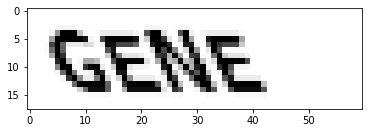

In [4]:
#Display the image GENE
%matplotlib inline
from matplotlib import pyplot as plt
image = create_captcha("GENE", shear=0.5, scale=0.6)
plt.imshow(image, cmap='Greys')

In [5]:
#Import skimage
from skimage.measure import label, regionprops
from skimage.filters import threshold_otsu
from skimage.morphology import closing, square

In [6]:
#Defines the subimages 
def segment_image(image):
    # label will find subimages of connected non-black pixels
    labeled_image = label(image>0.2, connectivity=1, background=0)
    subimages = []
    # regionprops splits up the subimages
    for region in regionprops(labeled_image):
        # Extract the subimage
        start_x, start_y, end_x, end_y = region.bbox
        subimages.append(image[start_x:end_x,start_y:end_y])
    if len(subimages) == 0:
        # No subimages found, so return the entire image
        return [image,]
    return subimages

In [7]:
#Sets the segment images 
subimages = segment_image(image)

In [8]:
#Prints the length of the subimages
len(subimages)

4

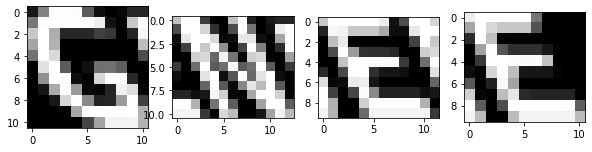

In [9]:
#Plot the subimages 
f, axes = plt.subplots(1, len(subimages), figsize=(10, 3)) 
for i in range(len(subimages)): 
    axes[i].imshow(subimages[i], cmap="gray")

In [10]:
#Check the random state, with all letters of the alphabet
from sklearn.utils import check_random_state
random_state = check_random_state(14) 
letters = list("ABCDEFGHIJKLMNOPQRSTUVWXYZ")
assert len(letters) == 26
shear_values = np.arange(0, 0.8, 0.05)
scale_values = np.arange(0.9, 1.1, 0.1)

In [11]:
#Prints the target
image, target = generate_sample(random_state) 
plt.imshow(image, cmap="Greys") 
print("The target for this image is: {0}".format(letters[target]))

NameError: name 'generate_sample' is not defined

In [12]:
#Generate dataset and target values
dataset, targets = zip(*(generate_sample(random_state) for i in range(1000)))
dataset = np.array([tf.resize(segment_image(sample)[0], (20, 20)) for sample in dataset])
dataset = np.array(dataset, dtype='float') 
targets = np.array(targets)

NameError: name 'generate_sample' is not defined

In [13]:
#Use onehotencoder
from sklearn.preprocessing import OneHotEncoder 
onehot = OneHotEncoder() 
y = onehot.fit_transform(targets.reshape(targets.shape[0],1))

NameError: name 'targets' is not defined

In [14]:
#Set to dense
y = y.todense()

NameError: name 'y' is not defined

In [15]:
#Reshape the dataset
X = dataset.reshape((dataset.shape[0], dataset.shape[1] * dataset.shape[2]))

NameError: name 'dataset' is not defined

In [16]:
#Split the dataset into training and testing
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9)

NameError: name 'X' is not defined

In [17]:
#Classification
#Here is the new Keras-based neural network

In [24]:
#Use Keras to build our neural network
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [25]:
#Create our two Dense layers and combine them in Sequential model
#Put 100 neurons in the hidden layer
hidden_layer = Dense(100, input_dim=X_train.shape[1])
output_layer = Dense(y_train.shape[1])

NameError: name 'X_train' is not defined

In [26]:
#Create the model
model = Sequential(layers=[hidden_layer, output_layer])
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

NameError: name 'hidden_layer' is not defined

In [27]:
#Fit the model, large number of epochs, use 1000 here
model.fit(X_train, y_train, nb_epoch=1000, verbose=False)

NameError: name 'model' is not defined

In [28]:
#Predict the model
y_pred = model.predict(X_test)

from sklearn.metrics import f1_score


f1_score(y_pred=y_pred.argmax(axis=1), y_true=y_test.argmax(axis=1), average='macro')

NameError: name 'model' is not defined

In [29]:
#Collect the resulting training history object to investigate the training further
from sklearn.metrics import classification_report

print(classification_report(y_pred=y_pred.argmax(axis=1),
                            y_true=y_test.argmax(axis=1)))

NameError: name 'y_pred' is not defined